<a href="https://colab.research.google.com/github/ReyhaneTaj/PINNs/blob/main/ForwardMode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q deepxde tensorflow

In [ ]:
!pip install -q --upgrade deepxde

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)
Compiling model...
Building feed-forward neural network...
'build' took 0.051929 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.286959 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [3.14e-03, 1.00e-06]    [2.72e-03, 1.00e-06]    [2.51e+02]    
1000      [7.91e-08, 7.54e-09]    [3.75e-08, 7.54e-09]    [3.32e-01]    
2000      [4.23e-07, 4.85e-07]    [2.42e-07, 4.85e-07]    [3.74e+00]    
3000      [6.76e-09, 7.75e-12]    [6.43e-09, 7.75e-12]    [8.16e-02]    
4000      [6.18e-09, 2.43e-13]    [6.17e-09, 2.43e-13]    [7.38e-02]    
5000      [9.27e-09, 1.00e-09]    [6.49e-09, 1.00e-09]    [3.06e-01]    
6000      [3.73e-09, 5.48e-16]    [4.20e-09, 5.48e-16]    [5.04e-02]    
7000      [3.04e-09, 1.50e-10]    [2.83e-09, 1.50e-10]    [1.26e-01]    
8000      [3.95e-06, 1.23e-06]    [2.62e-06, 1.23e-06]    [1.09e+01]    
9000      [9.41e-10, 3.29e-12]    [1.08e-09, 3.29e-12]    [3.64e-02]    
10000     [1.72e-08, 1.23e-10]    [1.34e-08, 1.23e-10]    [6.66e-01]    
11000     [4.45e-06, 3.16e-07]    [3.24e-06, 3.16e-07]    [1.15e+01]    
12000

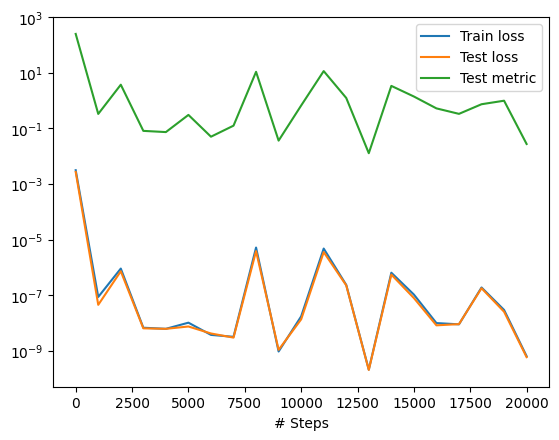

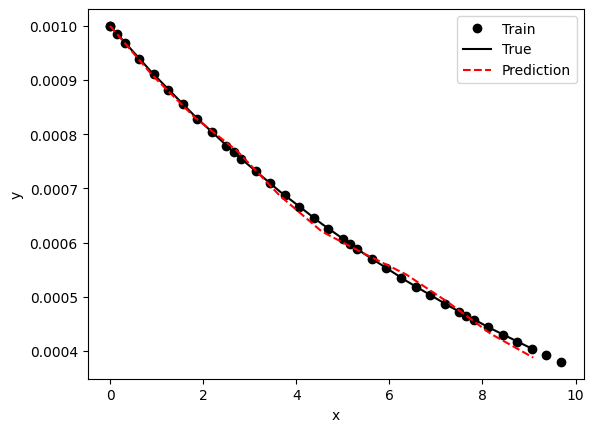

In [ ]:
###### Case0 #####
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

R = 1000.0
C = 0.01
U = 1.0

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def ode_system(x, I):
    I = I[:, 0:1]
    """ODE for dI/dt + I/(RC) = 0"""
    dI_dx = dde.grad.jacobian(I, x, i=0)
    return [dI_dx + I / (R * C)]

def func(x):
    """Exact solution for dI/dt + I/(RC) = 0"""
    # The exact solution
    return (U / R) * np.exp(-x / (R * C))

geom = dde.geometry.TimeDomain(0, 10)

# Define boundary conditions using DirichletBC
def boundary(_, on_initial):
    return on_initial

# Define the initial condition function
def initial_condition(x):
    return U / R  # Initial condition is constant

ic = dde.icbc.IC(geom, lambda x: U/R, boundary,component=0)  # Initial condition

data = dde.data.PDE(geom, ode_system, [ic], 35, 1, solution=func, num_test=10)

layer_size = [1] + [40] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)


In [ ]:
data.test_y

array([[0.1       ],
       [0.09131008],
       [0.0833753 ],
       [0.07613004],
       [0.06951439],
       [0.06347365],
       [0.05795783],
       [0.05292134],
       [0.04832251],
       [0.04412332],
       [0.04028904]], dtype=float32)

In [ ]:
!pip install -q deepxde tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.8 MB/s eta 0:00:00


Compiling model...
Building feed-forward neural network...
'build' took 0.103985 s

'compile' took 2.124965 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [1.32e-04, 1.00e-06]    [1.44e-04, 1.00e-06]    [2.06e+02]    
1000      [8.16e-09, 3.43e-14]    [5.99e-09, 3.43e-14]    [7.50e-01]    
2000      [9.20e-09, 1.03e-09]    [5.80e-09, 1.03e-09]    [1.06e+00]    
3000      [3.53e-07, 7.91e-08]    [1.81e-07, 7.91e-08]    [1.05e+01]    
4000      [1.48e-09, 9.70e-12]    [1.62e-09, 9.70e-12]    [2.33e-01]    
5000      [4.52e-10, 2.84e-11]    [5.62e-10, 2.84e-11]    [1.38e-01]    
6000      [9.25e-11, 8.83e-15]    [1.24e-10, 8.83e-15]    [7.93e-02]    
7000      [2.98e-08, 1.94e-13]    [1.60e-08, 1.94e-13]    [2.94e+00]    
8000      [1.87e-11, 5.84e-12]    [2.31e-11, 5.84e-12]    [3.65e-02]    
9000      [3.32e-11, 6.21e-13]    [5.42e-11, 6.21e-13]    [4.03e-02]    
10000     [4.98e-10, 2.00e-09]    [5.23e-10, 2.00e-09]    [5.12e-01

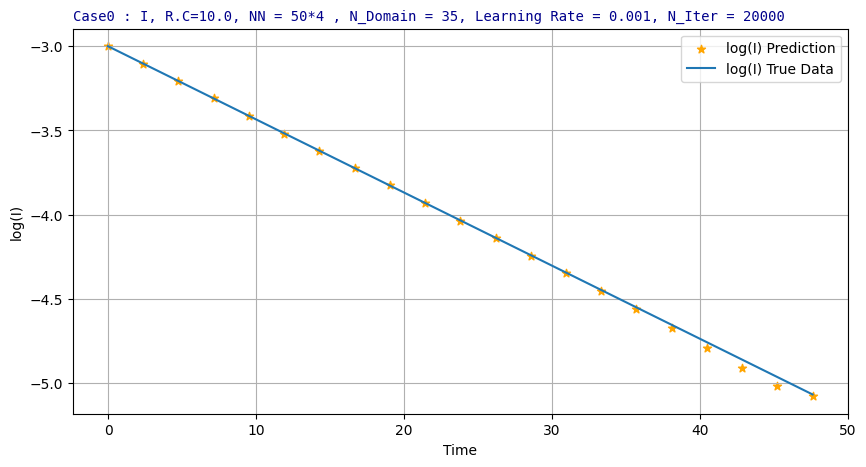

In [ ]:
###### Case0_log10 ######
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

R = 1000.0
C = 0.01
RC = R*C
U = 1.0
T = 50
#NN architecture
n = 50
l = 4
Lr = 0.001
N_Iter = 20000
N_Dom = 35
#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#define the differential equation
def ode_system(x, I):
    I = I[:, 0:1]
    """ODE for dI/dt + I/(RC) = 0"""
    dI_dx = dde.grad.jacobian(I, x, i=0)
    return [dI_dx + I / (R * C)]

#define analytical solution
def func(x):
    """Exact solution for dI/dt + I/(RC) = 0"""
    # The exact solution
    return (U / R) * np.exp(-x / (R * C))

geom = dde.geometry.TimeDomain(0, T)

# Define boundary conditions using DirichletBC
def boundary(_, on_initial):
    return on_initial

# Define the initial condition function
def initial_condition(x):
    return U / R  # Initial condition is constant

ic = dde.icbc.IC(geom, lambda x: U/R, boundary,component=0)  # Initial condition

data = dde.data.PDE(geom, ode_system, [ic], N_Dom, 1, solution=func, num_test=20)

layer_size = [1] + [n] * l + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr = Lr, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations = N_Iter)

# Make predictions
x_test = data.test_x  # Adjust the number of points as needed
y_pred = model.predict(x_test)

x_true = data.test_x
y_true = data.test_y

#x_train = data.train_x
#y_train = data.train_y
# Calculate the logarithm of y_pred (log I_pred)
log_I_pred = np.log10(y_pred)
log_I_true = np.log10(y_true)
#log_I_train = np.log10(y_train)

# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(x_test, log_I_pred, label='log(I) Prediction', c='orange' , marker='*')

# Plot log(I) Training Data as point markers
#plt.scatter(x_train, log_I_train, label='log(I) Training Data', c='red', marker='o')

# Plot log(I) True Data
plt.plot(x_true, log_I_true, label='log(I) True Data')

plt.xlabel('Time')
plt.ylabel('log(I)')
plt.legend()
plt.title(f'Case0 : I, R.C={RC}, NN = {n}*{l} , N_Domain = {N_Dom}, Learning Rate = {Lr}, N_Iter = {N_Iter}', loc='left', fontdict={'family': 'monospace', 'color':  'darkblue', 'weight': 'normal', 'size': 10})
plt.grid(True)

plt.show()

FP:


Compiling model...
Building feed-forward neural network...
'build' took 0.075221 s

'compile' took 0.708796 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [3.27e+00, 9.00e-02]    [2.95e+00, 9.00e-02]    [1.09e+01]    
1000      [2.67e-05, 1.35e-08]    [6.85e-06, 1.35e-08]    [6.64e-03]    
2000      [9.28e-06, 1.72e-09]    [1.36e-06, 1.72e-09]    [5.49e-03]    
3000      [3.79e-06, 3.25e-10]    [6.53e-07, 3.25e-10]    [4.57e-03]    
4000      [1.31e-06, 5.29e-11]    [4.53e-07, 5.29e-11]    [2.97e-03]    
5000      [2.29e-04, 1.37e-06]    [1.91e-04, 1.37e-06]    [8.88e-02]    
6000      [1.63e-07, 1.22e-12]    [2.74e-07, 1.22e-12]    [1.04e-03]    
7000      [4.17e-07, 7.22e-09]    [3.04e-07, 7.22e-09]    [3.23e-03]    
8000      [1.06e-07, 3.21e-13]    [1.87e-07, 3.21e-13]    [8.83e-04]    
9000      [1.15e-03, 1.17e-05]    [9.03e-04, 1.17e-05]    [1.96e-01]    
10000     [9.20e-08, 1.07e-13]    [1.73e-07, 1.07e-13]    [8.82e-04

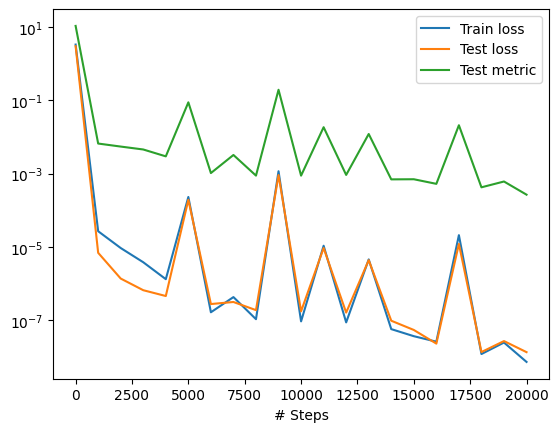

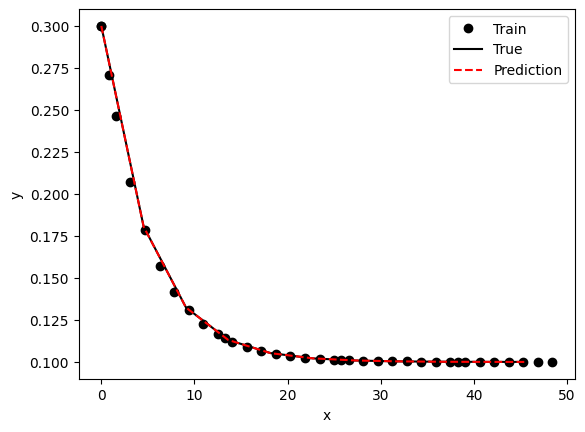

In [ ]:
###### Case1 ######
import deepxde as dde
import numpy as np

# Define desired values for the parameters
R_0 = 10.0
R_1 = 5.0
C_1 = 1.0
U_dc = 1.0

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def ode_system(x, I):
    """ODE for I = (U_dc / R_0) + R_1 * C_1 * (dI/dt)"""
    dI_dx = dde.grad.jacobian(I, x)
    return (R_1 * C_1*dI_dx) + I - (U_dc / R_0)

def func(x):
    """Exact solution for I = (U_dc / R_0) + R_1 * C_1 * (dI/dt)"""
    # The exact solution
    return (U_dc/R_1) * ((np.exp(-x/(R_1 * C_1)))) + (U_dc/R_0)

geom = dde.geometry.TimeDomain(0, 50)

# Define boundary conditions using DirichletBC
def boundary(_, on_initial):
    return on_initial

# Define the initial condition function
def initial_condition(x):
    return U_dc * (1/R_0 + 1/R_1)

ic = dde.icbc.IC(geom, lambda x: U_dc * (1/R_0 + 1/R_1), boundary,component=0) # Initial condition

data = dde.data.PDE(geom, ode_system, [ic], 35, 1, solution=func, num_test=10)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)


Compiling model...
Building feed-forward neural network...
'build' took 0.117888 s

'compile' took 0.968264 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [2.72e-01, 1.02e-02]    [4.61e-02, 1.02e-02]    [1.65e+00]    
1000      [1.56e-06, 6.72e-15]    [1.69e-06, 6.72e-15]    [7.99e-03]    
2000      [1.75e-07, 1.74e-13]    [3.31e-07, 1.74e-13]    [4.27e-03]    
3000      [6.35e-05, 2.91e-07]    [4.61e-05, 2.91e-07]    [6.52e-02]    
4000      [3.04e-08, 1.32e-12]    [2.40e-07, 1.32e-12]    [4.46e-03]    
5000      [2.13e-08, 1.80e-13]    [2.93e-07, 1.80e-13]    [4.63e-03]    
6000      [4.26e-08, 6.84e-13]    [4.31e-07, 6.84e-13]    [4.72e-03]    
7000      [3.29e-05, 6.28e-07]    [2.78e-05, 6.28e-07]    [4.58e-02]    
8000      [9.76e-09, 8.02e-14]    [2.00e-07, 8.02e-14]    [3.08e-03]    
9000      [4.33e-09, 1.96e-12]    [1.31e-07, 1.96e-12]    [2.51e-03]    
10000     [4.03e-09, 9.38e-15]    [1.06e-07, 9.38e-15]    [2.06e-03

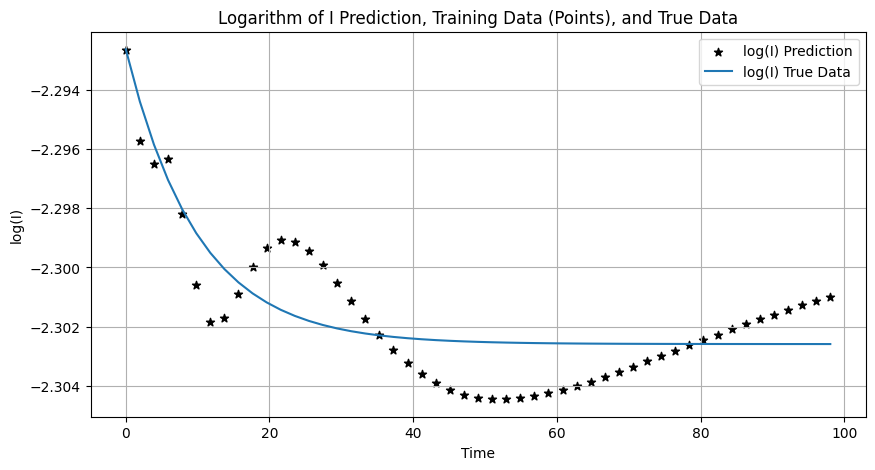

In [ ]:
###### Case1_log ######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

R_0 = 10.0
R_1 = 1000.0
C_1 = 0.01
U_dc = 1.0

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def ode_system(x, I):
    """ODE for I = (U_dc / R_0) + R_1 * C_1 * (dI/dt)"""
    dI_dx = dde.grad.jacobian(I, x)
    return (R_1 * C_1 * dI_dx) + I - (U_dc / R_0)

def func(x):
    """Exact solution for I = (U_dc / R_0) + R_1 * C_1 * (dI/dt)"""
    # The exact solution
    return (U_dc / R_0)+((U_dc / R_1) * ((np.exp(-x / (R_1 * C_1)))))

geom = dde.geometry.TimeDomain(0, 100)

# Define boundary conditions using DirichletBC
def boundary(_, on_initial):
    return on_initial

# Define the initial condition function
def initial_condition(x):
    return U_dc * (1/R_0 + 1/R_1)

ic = dde.icbc.IC(geom, lambda x: U_dc * (1/R_0 + 1/R_1), boundary, component=0)  # Initial condition

data = dde.data.TimePDE(geom, ode_system, [ic], 50, 1, solution=func, num_test=50)

layer_size = [1] + [40] * 4 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)

# Make predictions
x_test = data.test_x  # Adjust the number of points as needed
y_pred = model.predict(x_test)

x_true = data.test_x
y_true = data.test_y

x_train = data.train_x
y_train = data.train_y
# Calculate the logarithm of y_pred (log I_pred)
log_I_pred = np.log(y_pred)
log_I_true = np.log(y_true)
#log_I_train = np.log(y_train)

# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(x_test, log_I_pred, label='log(I) Prediction', c='black' , marker='*')

# Plot log(I) Training Data as point markers
#plt.scatter(x_train, log_I_train, label='log(I) Training Data', c='red', marker='o')

# Plot log(I) True Data
plt.plot(x_true, log_I_true, label='log(I) True Data')

plt.xlabel('Time')
plt.ylabel('log(I)')
plt.legend()
plt.title('Logarithm of I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.114245 s

'compile' took 1.423085 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [5.67e-01, 9.00e-06]    [3.00e-01, 9.00e-06]    [2.06e+02]    
1000      [6.04e-07, 1.83e-12]    [6.09e-07, 1.83e-12]    [1.09e-01]    
2000      [2.03e-08, 2.08e-12]    [1.70e-08, 2.08e-12]    [1.55e-02]    
3000      [3.46e-08, 8.19e-13]    [3.19e-08, 8.19e-13]    [2.24e-02]    
4000      [3.27e-08, 2.54e-12]    [3.14e-08, 2.54e-12]    [2.31e-02]    
5000      [1.40e-07, 5.16e-10]    [1.38e-07, 5.16e-10]    [7.40e-02]    
6000      [3.80e-08, 8.36e-13]    [3.60e-08, 8.36e-13]    [2.51e-02]    
7000      [2.74e-05, 3.48e-06]    [2.78e-05, 3.48e-06]    [2.08e+00]    
8000      [1.16e-08, 4.24e-12]    [1.05e-08, 4.24e-12]    [1.19e-02]    
9000      [1.09e-06, 1.89e-07]    [1.04e-06, 1.89e-07]    [4.12e-01]    
10000     [1.53e-04, 2.62e-05]    [1.03e-04, 2.62e-05]    [4.18e+00

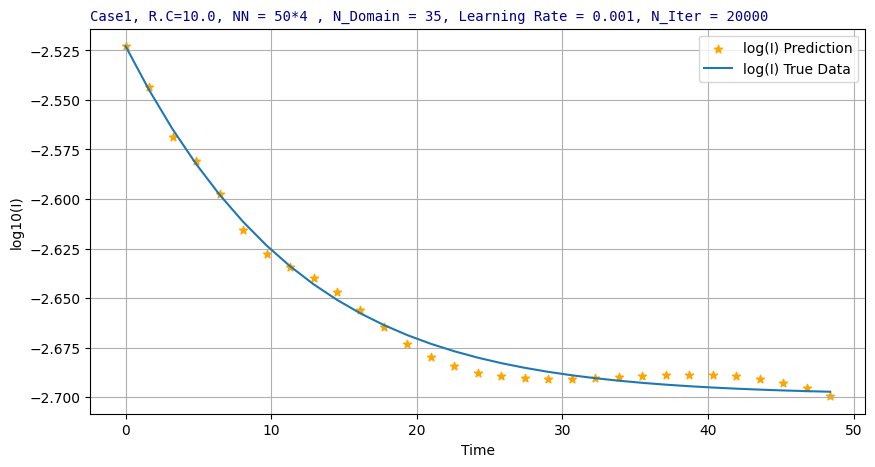

In [ ]:
###### Case1_log10 ######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

R_0 = 500.0
R_1 = 1000.0
C_1 = 0.01
U_dc = 1.0
T = 50
RC = R_1*C_1
#NN architecture
n = 50
l = 4
Lr = 0.001
N_Iter = 20000
N_Dom = 35

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def ode_system(x, I):
    """ODE for I = (U_dc / R_0) + R_1 * C_1 * (dI/dt)"""
    dI_dx = dde.grad.jacobian(I, x)
    return (R_1 * C_1 * dI_dx) + I - (U_dc / R_0)

def func(x):
    """Exact solution for I = (U_dc / R_0) + R_1 * C_1 * (dI/dt)"""
    # The exact solution
    return (U_dc / R_1) * ((np.exp(-x / (R_1 * C_1)))) + (U_dc / R_0)

geom = dde.geometry.TimeDomain(0, T)

# Define boundary conditions using DirichletBC
def boundary(_, on_initial):
    return on_initial

# Define the initial condition function
def initial_condition(x):
    return U_dc * (1/R_0 + 1/R_1)

ic = dde.icbc.IC(geom, lambda x: U_dc * (1/R_0 + 1/R_1), boundary, component=0)  # Initial condition

data = dde.data.TimePDE(geom, ode_system, [ic], N_Dom, 1, solution=func, num_test=30)

layer_size = [1] + [n] * l + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr= Lr, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations = N_Iter)

# Make predictions
x_test = data.test_x  # Adjust the number of points as needed
y_pred = model.predict(x_test)

x_true = data.test_x
y_true = data.test_y

x_train = data.train_x
y_train = data.train_y
# Calculate the logarithm of y_pred (log I_pred)
log_I_pred = np.log10(y_pred)
log_I_true = np.log10(y_true)
log_I_train = np.log10(y_train)

# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(x_test, log_I_pred, label='log(I) Prediction', c='orange' , marker='*')

# Plot log(I) Training Data as point markers
#plt.scatter(x_train, log_I_train, label='log(I) Training Data', c='red', marker='o')

# Plot log(I) True Data
plt.plot(x_true, log_I_true, label='log(I) True Data')

plt.xlabel('Time')
plt.ylabel('log10(I)')
plt.legend()
plt.title(f'Case1, R.C={RC}, NN = {n}*{l} , N_Domain = {N_Dom}, Learning Rate = {Lr}, N_Iter = {N_Iter}', loc='left', fontdict={'family': 'monospace', 'color':  'darkblue', 'weight': 'normal', 'size': 10})
plt.grid(True)

plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.069981 s

'compile' took 0.748130 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric   
0         [3.08e-02, 4.96e-02, 5.30e-02, 1.00e-06, 1.00e-06, 1.04e-02]    [3.12e-02, 4.98e-02, 5.04e-02, 1.00e-06, 1.00e-06, 1.04e-02]    [2.48e+00]    
1000      [1.58e-05, 2.35e-05, 4.70e-05, 1.50e-07, 1.38e-07, 9.15e-08]    [1.60e-05, 1.84e-05, 3.02e-05, 1.50e-07, 1.38e-07, 9.15e-08]    [6.96e-01]    
2000      [2.72e-06, 2.86e-06, 6.25e-06, 1.48e-08, 1.59e-08, 1.38e-08]    [2.82e-06, 1.94e-06, 6.81e-06, 1.48e-08, 1.59e-08, 1.38e-08]    [2.60e-01]    
3000      [1.57e-06, 1.59e-06, 4.60e-07, 7.80e-09, 8.56e-09, 9.36e-09]    [1.63e-06, 9.88e-07, 2.47e-07, 7.80e-09, 8.56e-09, 9.36e-09]    [1.75e-01]    
4000      [7.18e-07, 7.53e-07, 3.24e-07, 2.62e-09, 2.95e-09, 2.78e-09]    [7.23e-07, 3.92e-07, 2.02e-07, 

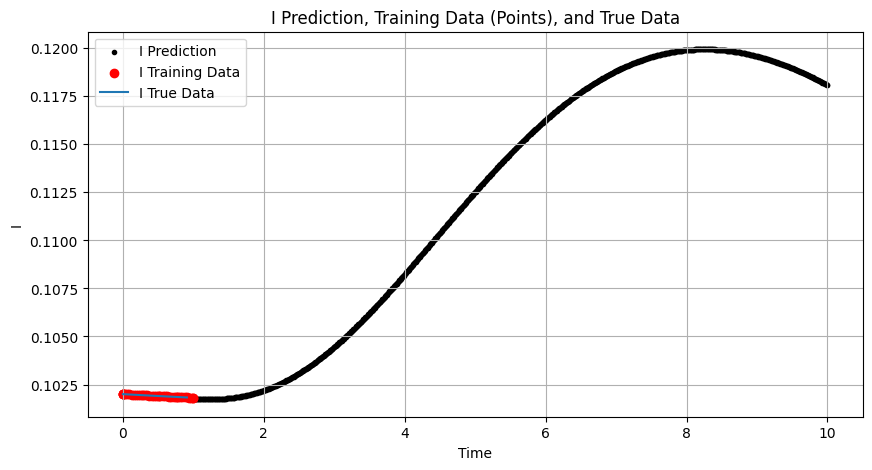

In [ ]:
#######...Case2_3...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

R_0 = 10.0
R_1 = 1000.0
R_2 = 1000.0
C_1 = 0.01
C_2 = 0.01
U_dc = 1.0

T=10.0
#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#define the differential equation
def ode_system(t, I):
    """ODE system.
    dI1/dt = -I1 / (R_1 * C_1)
    dI2/dt = -I2 / (R_2 * C_2)
    """
    # Most backends
    I1, I2,IT = I[:, 0:1], I[:, 1:2], I[:, 2:]
    dI1_t = dde.grad.jacobian(I, t, i=0)
    dI2_t = dde.grad.jacobian(I, t, i=1)
    # Backend jax
    # I_val, I_fn = y
    # I1, I2 = I_val[:, 0:1], I_val[:, 1:], I[:, 2:]
    # dI1_t, _ = dde.grad.jacobian(I, t, i=0)
    # dI2_t, _ = dde.grad.jacobian(I, t, i=1)

    return [dI1_t + (I1 / (R_1 * C_1)), dI2_t + I2 / (R_2 * C_2), IT-(U_dc / R_0)+(R_1 * C_1)*dI1_t+(R_2 * C_2)*dI2_t]


#define analytical solution
def func(t):
    """Exact solution for dI/dt + I/(RC) = 0"""
    # The exact solution
    return np.hstack(((U_dc / R_1) * np.exp(-t / (R_1 * C_1)), (U_dc / R_2) * np.exp(-t / (R_2 * C_2)),(U_dc / R_0)+(U_dc / R_1) * np.exp(-t / (R_1 * C_1))+ (U_dc / R_2) * np.exp(-t / (R_2 * C_2))))


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, T)

ic0 = dde.icbc.IC(geom, lambda t: (U_dc/R_1), boundary, component=0)
ic1 = dde.icbc.IC(geom, lambda t: (U_dc / R_2), boundary, component=1)
ic2 = dde.icbc.IC(geom, lambda t: (U_dc/R_0)+(U_dc/R_1)+(U_dc / R_2), boundary, component=2)

data = dde.data.PDE(geom, ode_system, [ic0, ic1, ic2], 35, 3, solution=func, num_test=10)

layer_size = [1] + [50] * 3 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)

# Generate time points for prediction
t_pred = np.linspace(0, T, 1000).reshape(-1, 1)  # Reshape for compatibility with the model
I_pred = model.predict(t_pred)

t_true = data.test_x
I_true = data.test_y

t_train = data.train_x
I_train = data.train_y

# Predict I1 and I2 using the trained model
I_pred = model.predict(t_pred)

# Extract IT from the predicted values
IT_pred = I_pred[:, 2:]

IT_true = I_true[:, 2:]

IT_train = I_train[:, 2:]


# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(t_pred, IT_pred, label='I Prediction', c='black' , marker='.')

# Plot log(I) Training Data as point markers
plt.scatter(t_train, IT_train, label='I Training Data', c='red', marker='o')

# Plot log(I) True Data
plt.plot(t_true, IT_true, label='I True Data')

plt.xlabel('Time')
plt.ylabel('I')
plt.legend()
plt.title('I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()
#dde.saveplot(losshistory, train_state, issave=True, isplot=True)

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)
Compiling model...
Building feed-forward neural network...
'build' took 0.143692 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.977885 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [3.00e-03, 5.80e-03, 1.44e-04, 1.00e-06]    [2.64e-03, 1.59e-03, 1.44e-04, 1.00e-06]    [4.31e+01]    
1000      [7.80e-09, 2.53e-08, 3.74e-08, 4.20e-06]    [8.76e-09, 3.23e-08, 3.74e-08, 4.20e-06]    [1.50e-01]    
2000      [5.10e-05, 7.96e-07, 1.54e-06, 8.10e-07]    [4.60e-05, 5.15e-07, 1.54e-06, 8.10e-07]    [3.02e+00]    
3000      [1.34e-09, 1.31e-09, 1.03e-13, 2.54e-10]    [5.51e-10, 3.57e-09, 1.03e-13, 2.54e-10]    [1.30e-02]    
4000      [1.02e-08, 1.38e-09, 3.23e-10, 1.57e-10]    [8.14e-09, 2.79e-09, 3.23e-10, 1.57e-10]    [4.50e-02]    
5000      [9.06e-09, 4.61e-10, 5.01e-10, 2.29e-09]    [7.87e-09, 8.36e-10, 5.01e-10, 2.29e-09]    [3.83e-02]    
6000      [5.21e-07, 2.28e-07, 2.85e-08, 7.11e-07]    [4.59e-07, 1.20e-07, 2.85e-08, 7.11e-07]    [4.23e-01]    
7000      [4.14e-09, 4.18e-10, 2.11e-10, 3.58e-10]

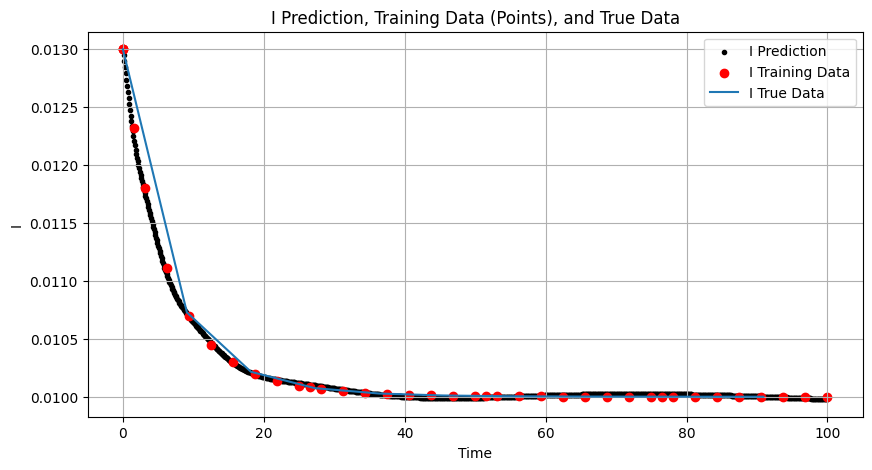

In [ ]:
#######...Case2...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

R_0 = 100.0
R_1 = 500.0
R_2 = 1000.0
C_1 = 0.01
C_2 = 0.01
U_dc = 1.0

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#define the differential equation
def ode_system(t, I):
    """ODE system.
    dI1/dt = -I1 / (R_1 * C_1) + (U_dc / (R_0*R_1*C_1))
    dI2/dt = -I2 / (R_2 * C_2)
    """
    # Most backends
    I1, I2 = I[:, 0:1], I[:, 1:]
    dI1_t = dde.grad.jacobian(I, t, i=0)
    dI2_t = dde.grad.jacobian(I, t, i=1)
    # Backend jax
    # I_val, I_fn = y
    # I1, I2 = I_val[:, 0:1], I_val[:, 1:]
    # dI1_t, _ = dde.grad.jacobian(I, t, i=0)
    # dI2_t, _ = dde.grad.jacobian(I, t, i=1)
    return [dI1_t + (I1 / (R_1 * C_1))-(U_dc / (R_0 * R_1 * C_1)), dI2_t + I2 / (R_2 * C_2)]



#define analytical solution
def func(t):
    """Exact solution for dI/dt + I/(RC) = 0"""
    # The exact solution
    return np.hstack(((U_dc / R_0)+(U_dc / R_1) * np.exp(-t / (R_1 * C_1)), (U_dc / R_2) * np.exp(-t / (R_2 * C_2))))


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, 100)
ic0 = dde.icbc.IC(geom, lambda t: U_dc * (1/R_0 + 1/R_1), boundary, component=0)
ic1 = dde.icbc.IC(geom, lambda t: (U_dc / R_2), boundary, component=1)

data = dde.data.PDE(geom, ode_system, [ic0, ic1], 35, 2, solution=func, num_test=10)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)


# Generate time points for prediction
t_pred = np.linspace(0, 100, 1000).reshape(-1, 1)  # Reshape for compatibility with the model
I_pred = model.predict(t_pred)

t_true = data.test_x
I_true = data.test_y

t_train = data.train_x
I_train = data.train_y

# Predict I1 and I2 using the trained model
I_pred = model.predict(t_pred)

# Extract I1 and I2 from the predicted values
I1_pred = I_pred[:, 0]
I2_pred = I_pred[:, 1]

I1_true = I_true[:, 0]
I2_true = I_true[:, 1]

I1_train = I_train[:, 0]
I2_train = I_train[:, 1]

# Calculate the sum of I1 and I2
I_sum_pred = I1_pred + I2_pred
I_sum_train = I1_train + I2_train
I_sum_true = I1_true + I2_true



# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(t_pred, I_sum_pred, label='I Prediction', c='black' , marker='.')

# Plot log(I) Training Data as point markers
plt.scatter(t_train, I_sum_train, label='I Training Data', c='red', marker='o')

# Plot log(I) True Data
plt.plot(t_true, I_sum_true, label='I True Data')

plt.xlabel('Time')
plt.ylabel('I')
plt.legend()
plt.title('I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()
#dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [ ]:
!pip install -q deepxde tensorflow

Compiling model...
Building feed-forward neural network...
'build' took 0.112897 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.755534 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric   
0         [1.93e-03, 1.90e-03, 2.42e-01, 1.44e-04, 1.00e-06, 1.00e-04]    [1.67e-03, 6.62e-04, 2.55e-01, 1.44e-04, 1.00e-06, 1.00e-04]    [3.50e+01]    
1000      [2.84e-08, 2.09e-07, 3.35e-07, 4.20e-13, 1.44e-13, 1.07e-09]    [1.58e-08, 1.65e-07, 2.53e-07, 4.20e-13, 1.44e-13, 1.07e-09]    [3.32e-02]    
2000      [1.34e-08, 1.24e-07, 1.51e-07, 6.57e-15, 3.24e-13, 2.80e-10]    [9.01e-09, 8.71e-08, 1.13e-07, 6.57e-15, 3.24e-13, 2.80e-10]    [2.31e-02]    
3000      [1.44e-08, 8.16e-08, 7.91e-08, 3.47e-16, 3.08e-13, 8.70e-11]    [9.46e-09, 5.43e-08, 5.78e-08, 3.47e-16, 3.08e-13, 8.70e-11]    [1.84e-02]    
4000      [1.61e-08, 8.37e-08, 4.28e-08, 1.58e-14, 2.78e-14, 4.76e-11]    [1.15e-08, 6.20e-08, 3.13e-08, 1.58e-14, 2.78e-14, 4.76e-11]    [1.74e-02]    
5000      [1.63e-08, 5.09e-08, 4.71e

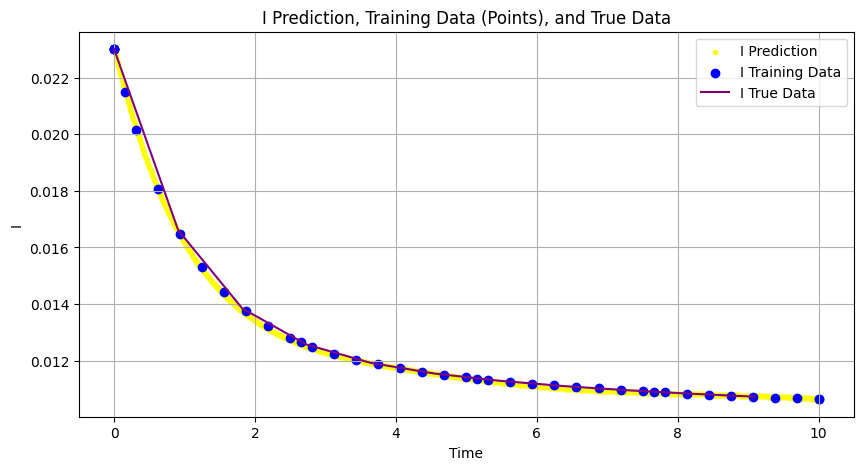

In [ ]:
#######...Case3...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

R_0 = 100.0
R_1 = 500.0
R_2 = 1000.0
R_3 = 100.0
C_1 = 0.01
C_2 = 0.01
C_3 = 0.01
U_dc = 1.0

T = 10
#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#define the differential equation
def ode_system(t, I):
    """ODE system.
    dI1/dt = -I1 / (R_1 * C_1) + (U_dc / (R_0*R_1*C_1))
    dI2/dt = -I2 / (R_2 * C_2)
    dI3/dt = -I3 / (R_3 * C_3)
    """
    # Most backends
    I1, I2, I3 = I[:, 0:1], I[:, 1:2], I[:, 2:]
    dI1_t = dde.grad.jacobian(I, t, i=0)
    dI2_t = dde.grad.jacobian(I, t, i=1)
    dI3_t = dde.grad.jacobian(I, t, i=2)
    # Backend jax
    # I_val, I_fn = y
    # I1, I2 = I_val[:, 0:1], I_val[:, 1:]
    # dI1_t, _ = dde.grad.jacobian(I, t, i=0)
    # dI2_t, _ = dde.grad.jacobian(I, t, i=1)
    # dI3_t,_ = dde.grad.jacobian(I, t, i=2)
    return [dI1_t + (I1 / (R_1 * C_1))-(U_dc / (R_0 * R_1 * C_1)), dI2_t + I2 / (R_2 * C_2), dI3_t + I3 / (R_3 * C_3)]



#define analytical solution
def func(t):
    """Exact solution for dI/dt + I/(RC) = 0"""
    # The exact solution
    return np.hstack(((U_dc / R_0)+(U_dc / R_1) * np.exp(-t / (R_1 * C_1)), (U_dc / R_2) * np.exp(-t / (R_2 * C_2)), (U_dc / R_3) * np.exp(-t / (R_3 * C_3))))


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, T)
ic0 = dde.icbc.IC(geom, lambda t: U_dc * (1/R_0 + 1/R_1), boundary, component=0)
ic1 = dde.icbc.IC(geom, lambda t: (U_dc / R_2), boundary, component=1)
ic2 = dde.icbc.IC(geom, lambda t: (U_dc / R_3), boundary, component=2)

data = dde.data.PDE(geom, ode_system, [ic0, ic1, ic2], 35, 3, solution=func, num_test=10)

layer_size = [1] + [50] * 3 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)


# Generate time points for prediction
t_pred = np.linspace(0, T, 1000).reshape(-1, 1)  # Reshape for compatibility with the model
I_pred = model.predict(t_pred)

t_true = data.test_x
I_true = data.test_y

t_train = data.train_x
I_train = data.train_y

# Predict I1 and I2 using the trained model
I_pred = model.predict(t_pred)

# Extract I1 and I2 from the predicted values
I1_pred = I_pred[:, 0]
I2_pred = I_pred[:, 1]
I3_pred = I_pred[:, 2]

I1_true = I_true[:, 0]
I2_true = I_true[:, 1]
I3_true = I_true[:, 2]

I1_train = I_train[:, 0]
I2_train = I_train[:, 1]
I3_train = I_train[:, 2]

# Calculate the sum of I1 and I2
I_sum_pred = I1_pred + I2_pred + I3_pred
I_sum_train = I1_train + I2_train + I3_train
I_sum_true = I1_true + I2_true + I3_true



# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(t_pred, I_sum_pred, label='I Prediction', c='yellow' , marker='.')

# Plot log(I) Training Data as point markers
plt.scatter(t_train, I_sum_train, label='I Training Data', c='blue', marker='o')

# Plot log(I) True Data
plt.plot(t_true, I_sum_true, label='I True Data',  c='purple')

plt.xlabel('Time')
plt.ylabel('I')
plt.legend()
plt.title('I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()
#dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [ ]:
!pip install -q deepxde tensorflow

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)
Compiling model...
Building feed-forward neural network...
'build' took 0.080993 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.659859 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric   
0         [7.64e-02, 1.58e-02, 2.97e-03, 1.21e-04, 1.00e-04, 1.00e-04]    [7.08e-02, 8.33e-03, 2.73e-03, 1.21e-04, 1.00e-04, 1.00e-04]    [1.47e+02]    
1000      [1.66e-07, 6.91e-08, 2.02e-07, 2.39e-14, 7.83e-13, 3.20e-10]    [1.38e-07, 6.46e-08, 1.54e-07, 2.39e-14, 7.83e-13, 3.20e-10]    [1.52e+00]    
2000      [1.02e-07, 9.47e-09, 1.49e-07, 1.33e-13, 2.75e-14, 2.59e-10]    [9.39e-08, 9.93e-09, 1.13e-07, 1.33e-13, 2.75e-14, 2.59e-10]    [1.54e+00]    
3000      [6.17e-08, 1.99e-09, 1.27e-07, 4.21e-11, 9.24e-12, 5.16e-13]    [5.52e-08, 1.55e-09, 9.43e-08, 4.21e-11, 9.24e-12, 5.16e-13]    [1.54e+00]    
4000      [2.82e-08, 2.30e-09, 4.73e-08, 5.60e-14, 1.05e-16, 9.35e-11]    [2.61e-08, 2.34e-10, 3.43e-08, 5.60e-14, 1.05e-16, 9.35e-11]    [1.53e+00]    
5000      [1.34e-08, 4.65e-09, 2.16e

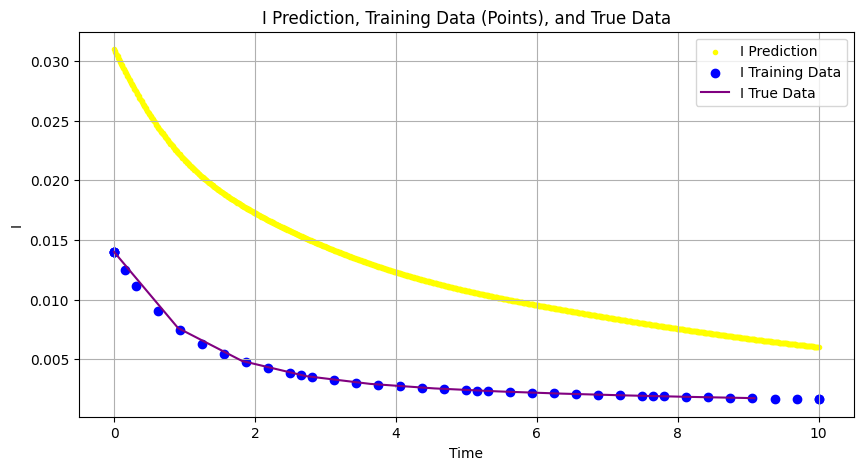

In [ ]:
###...CaseN...###

import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

# Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def generate_case_N(R_values, C_values):
    N = len(R_values)
    Rr = 1000.0
    U_dc = 1.0
    # Define the differential equation
    def ode_system(t, I):
      derivatives = []
      for i in range(N):
          derivative_i = dde.grad.jacobian(I, t, i=i) + I[:, i:i+1] / (R_values[i][0] * C_values[i][0])
          derivatives.append(derivative_i)
      derivatives[0]=derivatives[0]-U_dc / (Rr * R_values[0][0] * C_values[0][0])
      return derivatives

    # Define analytical solution
    def func(t):
        solutions = []
        for i in range(N):
            R, C = R_values[i][0], C_values[i][0]
            if i == 0:
                solution_i = ((U_dc / Rr) + (U_dc / (R_values[i][0])) * np.exp(-t / (R_values[i][0] * C_values[i][0])))
            else:
                solution_i = ((U_dc / R_values[i][0]) * np.exp(-t / (R_values[i][0] * C_values[i][0])))
            solutions.append(solution_i)
        return np.hstack(tuple(solutions))

              # Define analytical solution
    def func(t):
      solutions = []
      for i in range(N):
          R, C = R_values[i][0], C_values[i][0]
          if i == 0:
              solution_i = ((U_dc / Rr) + (U_dc / (R_values[i][0])) * np.exp(-t / (R_values[i][0] * C_values[i][0])))
          else:
              solution_i = ((U_dc / R_values[i][0]) * np.exp(-t / (R_values[i][0] * C_values[i][0])))
          solutions.append(solution_i)
      return np.hstack(solutions)

    # Define the initial condition function
    def boundary(_, on_initial):
        return on_initial

    geom = dde.geometry.TimeDomain(0, 10)
    initial_conditions = []
    for i in range(N):
      if i == 0:
        initial_conditions_i = dde.IC(geom, lambda X: U_dc * (1/Rr + 1/R_values[i][0]), boundary, component=i)
      else:
         initial_conditions_i = dde.IC(geom, lambda X: U_dc * (1/R_values[i][0]), boundary, component=i)
      initial_conditions.append(initial_conditions_i)

    data = dde.data.PDE(geom, ode_system, initial_conditions, 35, N, solution=func, num_test=10)

    layer_size = [1] + [50] * 3 + [N]
    activation = "tanh"
    initializer = "Glorot uniform"
    net = dde.maps.FNN(layer_size, activation, initializer)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    losshistory, train_state = model.train(iterations=20000)

    # Generate time points for prediction
    t_pred = np.linspace(0, 10, 1000).reshape(-1, 1)
    I_pred = model.predict(t_pred)

    t_true = data.test_x
    I_true = data.test_y

    t_train = data.train_x
    I_train = data.train_y

    I_sum_pred = np.sum(I_pred, axis=1)
    I_sum_true = np.sum(I_true, axis=1)
    I_sum_train = np.sum(I_train, axis=1)

    plt.figure(figsize=(10, 5))
    plt.scatter(t_pred, I_sum_pred, label='I Prediction', c='yellow', marker='.')
    plt.scatter(t_train, I_sum_train, label='I Training Data', c='blue', marker='o')
    plt.plot(t_true, I_sum_true, label='I True Data', c='purple')
    plt.xlabel('Time')
    plt.ylabel('I')
    plt.legend()
    plt.title('I Prediction, Training Data (Points), and True Data')
    plt.grid(True)
    plt.show()

# Example usage for Case3
R_values = np.array([[500.0], [1000.0],[100.0],])
C_values = np.array([[0.01], [0.01], [0.01]])

generate_case_N(R_values, C_values)


# consideration


### Step 0: test previous method:

Compiling model...
Building feed-forward neural network...
'build' took 0.063996 s

'compile' took 0.658735 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric   
0         [8.25e-02, 1.77e-02, 2.33e-01, 1.44e-04, 1.00e-06, 1.00e-04]    [5.98e-02, 1.26e-02, 2.43e-01, 1.44e-04, 1.00e-06, 1.00e-04]    [7.65e+01]    
1000      [2.87e-07, 5.52e-07, 4.16e-08, 2.76e-11, 5.88e-13, 6.74e-11]    [3.00e-07, 3.53e-07, 3.63e-08, 2.76e-11, 5.88e-13, 6.74e-11]    [8.16e-02]    
2000      [5.56e-08, 1.27e-07, 2.25e-08, 2.49e-12, 2.03e-12, 7.96e-14]    [3.66e-08, 7.89e-08, 1.57e-08, 2.49e-12, 2.03e-12, 7.96e-14]    [3.08e-02]    
3000      [3.62e-08, 5.91e-08, 1.03e-08, 1.07e-12, 2.29e-14, 2.17e-12]    [2.23e-08, 3.84e-08, 9.31e-09, 1.07e-12, 2.29e-14, 2.17e-12]    [1.88e-02]    
4000      [2.39e-08, 5.39e-08, 5.08e-09, 1.08e-12, 5.80e-14, 2.76e-13]    [1.30e-08, 4.03e-08, 1.82e-09, 

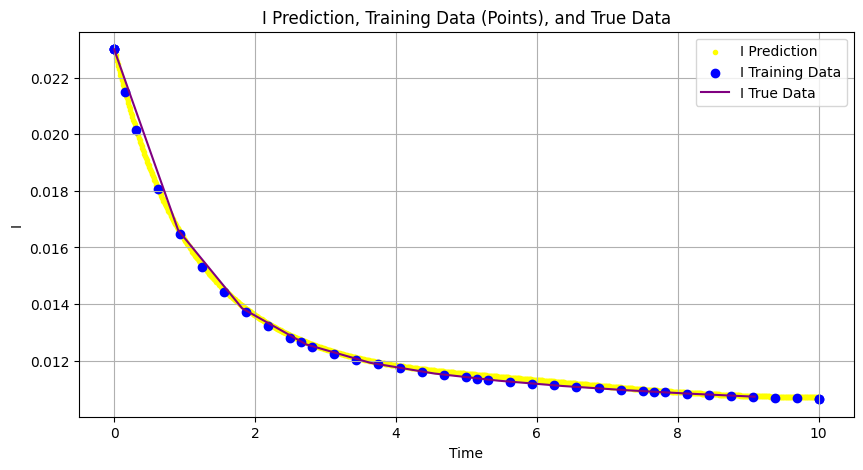

In [ ]:
#######...Case3...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

R_0 = 100.0
R_1 = 500.0
R_2 = 1000.0
R_3 = 100.0
C_1 = 0.01
C_2 = 0.01
C_3 = 0.01
U_dc = 1.0

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#define the differential equation
def ode_system(t, I):
    """ODE system.
    dI1/dt = -I1 / (R_1 * C_1) + (U_dc / (R_0*R_1*C_1))
    dI2/dt = -I2 / (R_2 * C_2)
    dI3/dt = -I3 / (R_3 * C_3)
    """
    # Most backends
    I1, I2, I3 = I[:, 0:1], I[:, 1:2], I[:, 2:]
    dI1_t = dde.grad.jacobian(I, t, i=0)
    dI2_t = dde.grad.jacobian(I, t, i=1)
    dI3_t = dde.grad.jacobian(I, t, i=2)
    # Backend jax
    # I_val, I_fn = y
    # I1, I2 = I_val[:, 0:1], I_val[:, 1:]
    # dI1_t, _ = dde.grad.jacobian(I, t, i=0)
    # dI2_t, _ = dde.grad.jacobian(I, t, i=1)
    # dI3_t,_ = dde.grad.jacobian(I, t, i=2)
    return [dI1_t + (I1 / (R_1 * C_1))-(U_dc / (R_0 * R_1 * C_1)), dI2_t + I2 / (R_2 * C_2), dI3_t + I3 / (R_3 * C_3)]



#define analytical solution
def func(t):
    """Exact solution for dI/dt + I/(RC) = 0"""
    # The exact solution
    return np.hstack(((U_dc / R_0)+(U_dc / R_1) * np.exp(-t / (R_1 * C_1)), (U_dc / R_2) * np.exp(-t / (R_2 * C_2)), (U_dc / R_3) * np.exp(-t / (R_3 * C_3))))


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, 10)
ic0 = dde.icbc.IC(geom, lambda t: U_dc * (1/R_0 + 1/R_1), boundary, component=0)
ic1 = dde.icbc.IC(geom, lambda t: (U_dc / R_2), boundary, component=1)
ic2 = dde.icbc.IC(geom, lambda t: (U_dc / R_3), boundary, component=2)

data = dde.data.PDE(geom, ode_system, [ic0, ic1, ic2], 35, 3, solution=func, num_test=10)

layer_size = [1] + [50] * 3 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)


# Generate time points for prediction
t_pred = np.linspace(0, 10, 1000).reshape(-1, 1)  # Reshape for compatibility with the model
I_pred = model.predict(t_pred)

t_true = data.test_x
I_true = data.test_y

t_train = data.train_x
I_train = data.train_y

# Predict I1 and I2 using the trained model
I_pred = model.predict(t_pred)

# Extract I1 and I2 from the predicted values
I1_pred = I_pred[:, 0]
I2_pred = I_pred[:, 1]
I3_pred = I_pred[:, 2]

I1_true = I_true[:, 0]
I2_true = I_true[:, 1]
I3_true = I_true[:, 2]

I1_train = I_train[:, 0]
I2_train = I_train[:, 1]
I3_train = I_train[:, 2]

# Calculate the sum of I1 and I2
I_sum_pred = I1_pred + I2_pred + I3_pred
I_sum_train = I1_train + I2_train + I3_train
I_sum_true = I1_true + I2_true + I3_true



# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(t_pred, I_sum_pred, label='I Prediction', c='yellow' , marker='.')

# Plot log(I) Training Data as point markers
plt.scatter(t_train, I_sum_train, label='I Training Data', c='blue', marker='o')

# Plot log(I) True Data
plt.plot(t_true, I_sum_true, label='I True Data',  c='purple')

plt.xlabel('Time')
plt.ylabel('I')
plt.legend()
plt.title('I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()
#dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# consideration
### Step 1: modify ODE_system function

Compiling model...
Building feed-forward neural network...
'build' took 0.067106 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.086957 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric   
0         [4.60e-03, 5.71e-02, 1.13e-02, 1.44e-04, 1.00e-06, 1.00e-04]    [4.66e-03, 5.07e-02, 9.79e-03, 1.44e-04, 1.00e-06, 1.00e-04]    [7.43e+01]    
1000      [2.35e-07, 7.64e-07, 9.36e-05, 1.77e-08, 1.55e-07, 5.41e-07]    [2.51e-07, 5.32e-07, 9.83e-05, 1.77e-08, 1.55e-07, 5.41e-07]    [7.11e-01]    
2000      [1.37e-08, 4.33e-08, 4.36e-07, 1.11e-13, 1.90e-13, 4.71e-10]    [8.60e-09, 2.84e-08, 3.57e-07, 1.11e-13, 1.90e-13, 4.71e-10]    [2.79e-02]    
3000      [1.03e-08, 1.26e-08, 2.44e-07, 1.99e-13, 1.05e-13, 2.36e-10]    [7.04e-09, 6.76e-09, 1.95e-07, 1.99e-13, 1.05e-13, 2.36e-10]    [2.02e-02]    
4000      [1.59e-08, 1.00e-08, 3.04e-07, 7.11e-11, 1.09e-09, 5.29e-10]    [1.43e-08, 8.69e-09, 3.04e-07, 7.11e-11, 1.09e-09, 5.29e-10]    [3.77e-02]    
5000      [1.80e-06, 5.95e-06, 4.18e

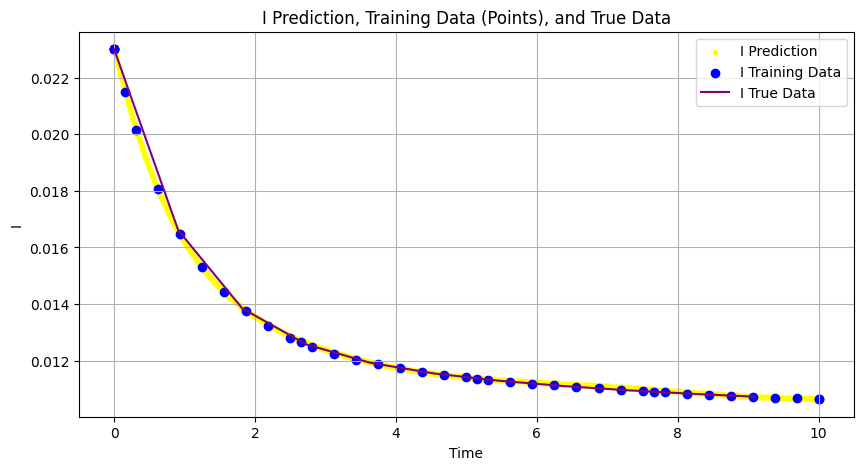

In [ ]:
#######...Case3...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

R_0 = 100.0
R_1 = 500.0
R_2 = 1000.0
R_3 = 100.0
C_1 = 0.01
C_2 = 0.01
C_3 = 0.01

Rr = 100.0
R_values = np.array([[500.0], [1000.0],[100.0]])
C_values = np.array([[0.01], [0.01], [0.01]])

U_dc = 1.0
N=len(R_values)

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)




# Define the differential equation
def ode_system(t, I):
    derivatives = []
    for i in range(N):
        derivative_i = dde.grad.jacobian(I, t, i=i) + I[:, i:i+1] / (R_values[i][0] * C_values[i][0])
        derivatives.append(derivative_i)
    derivatives[0]=derivatives[0]-U_dc / (Rr * R_values[0][0] * C_values[0][0])
    return derivatives




#define analytical solution
def func(t):
    """Exact solution for dI/dt + I/(RC) = 0"""
    # The exact solution
    return np.hstack(((U_dc / R_0)+(U_dc / R_1) * np.exp(-t / (R_1 * C_1)), (U_dc / R_2) * np.exp(-t / (R_2 * C_2)), (U_dc / R_3) * np.exp(-t / (R_3 * C_3))))


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, 10)
ic0 = dde.icbc.IC(geom, lambda t: U_dc * (1/R_0 + 1/R_1), boundary, component=0)
ic1 = dde.icbc.IC(geom, lambda t: (U_dc / R_2), boundary, component=1)
ic2 = dde.icbc.IC(geom, lambda t: (U_dc / R_3), boundary, component=2)

data = dde.data.PDE(geom, ode_system, [ic0, ic1, ic2], 35, 3, solution=func, num_test=10)

layer_size = [1] + [50] * 3 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)


# Generate time points for prediction
t_pred = np.linspace(0, 10, 1000).reshape(-1, 1)  # Reshape for compatibility with the model
I_pred = model.predict(t_pred)

t_true = data.test_x
I_true = data.test_y

t_train = data.train_x
I_train = data.train_y

# Predict I1 and I2 using the trained model
I_pred = model.predict(t_pred)

# Extract I1 and I2 from the predicted values
I1_pred = I_pred[:, 0]
I2_pred = I_pred[:, 1]
I3_pred = I_pred[:, 2]

I1_true = I_true[:, 0]
I2_true = I_true[:, 1]
I3_true = I_true[:, 2]

I1_train = I_train[:, 0]
I2_train = I_train[:, 1]
I3_train = I_train[:, 2]

# Calculate the sum of I1 and I2
I_sum_pred = I1_pred + I2_pred + I3_pred
I_sum_train = I1_train + I2_train + I3_train
I_sum_true = I1_true + I2_true + I3_true



# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(t_pred, I_sum_pred, label='I Prediction', c='yellow' , marker='.')

# Plot log(I) Training Data as point markers
plt.scatter(t_train, I_sum_train, label='I Training Data', c='blue', marker='o')

# Plot log(I) True Data
plt.plot(t_true, I_sum_true, label='I True Data',  c='purple')

plt.xlabel('Time')
plt.ylabel('I')
plt.legend()
plt.title('I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()
#dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# consideration:

### Step2: Modifying func


Compiling model...
Building feed-forward neural network...
'build' took 0.062981 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.734691 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric   
0         [2.54e-02, 8.36e-04, 1.76e-01, 1.44e-04, 1.00e-06, 1.00e-04]    [2.53e-02, 7.14e-04, 1.75e-01, 1.44e-04, 1.00e-06, 1.00e-04]    [4.67e+01]    
1000      [1.12e-06, 2.56e-07, 2.55e-07, 6.97e-11, 2.42e-12, 1.52e-09]    [1.05e-06, 2.52e-07, 1.05e-07, 6.97e-11, 2.42e-12, 1.52e-09]    [8.04e-02]    
2000      [3.97e-07, 1.17e-07, 1.93e-07, 1.41e-11, 1.92e-14, 5.87e-10]    [3.84e-07, 9.61e-08, 1.16e-07, 1.41e-11, 1.92e-14, 5.87e-10]    [5.00e-02]    
3000      [1.13e-07, 4.50e-08, 1.70e-07, 1.99e-12, 8.17e-14, 2.92e-10]    [1.15e-07, 3.73e-08, 1.17e-07, 1.99e-12, 8.17e-14, 2.92e-10]    [2.70e-02]    
4000      [6.36e-08, 1.72e-08, 1.61e-05, 1.02e-11, 1.87e-09, 5.93e-08]    [6.21e-08, 1.19e-08, 1.65e-05, 1.02e-11, 1.87e-09, 5.93e-08]    [2.70e-01]    
5000      [4.15e-08, 4.59e-09, 1.43e

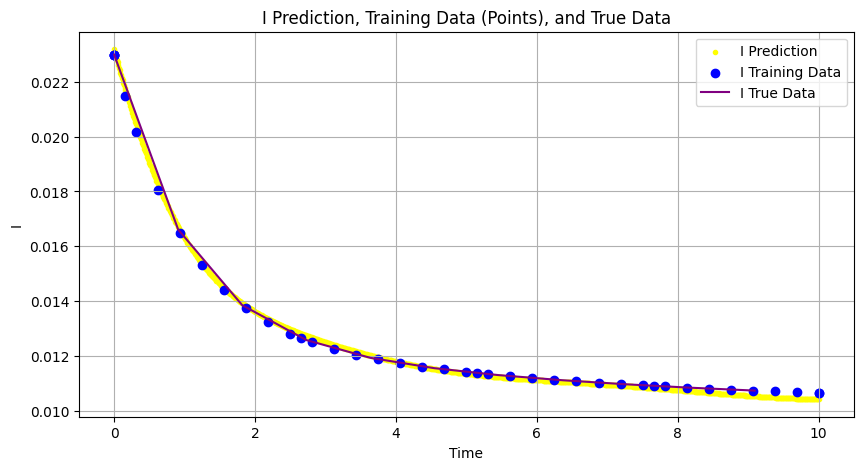

In [ ]:
#######...Case3...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

R_0 = 100.0
R_1 = 500.0
R_2 = 1000.0
R_3 = 100.0
C_1 = 0.01
C_2 = 0.01
C_3 = 0.01

Rr = 100.0
R_values = np.array([[500.0], [1000.0],[100.0]])
C_values = np.array([[0.01], [0.01], [0.01]])

U_dc = 1.0
N=len(R_values)

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)




# Define the differential equation
def ode_system(t, I):
    derivatives = []
    for i in range(N):
        derivative_i = dde.grad.jacobian(I, t, i=i) + I[:, i:i+1] / (R_values[i][0] * C_values[i][0])
        derivatives.append(derivative_i)
    derivatives[0]=derivatives[0]-U_dc / (Rr * R_values[0][0] * C_values[0][0])
    return derivatives

    # Define analytical solution
def func(t):
    solutions = []
    for i in range(N):
        R, C = R_values[i][0], C_values[i][0]
        if i == 0:
            solution_i = ((U_dc / Rr) + (U_dc / (R_values[i][0])) * np.exp(-t / (R_values[i][0] * C_values[i][0])))
        else:
            solution_i = ((U_dc / R_values[i][0]) * np.exp(-t / (R_values[i][0] * C_values[i][0])))
        solutions.append(solution_i)
    return np.hstack(tuple(solutions))

#define analytical solution
#def func(t):
#    """Exact solution for dI/dt + I/(RC) = 0"""
#    # The exact solution
#    return np.hstack(((U_dc / R_0)+(U_dc / R_1) * np.exp(-t / (R_1 * C_1)), (U_dc / R_2) * np.exp(-t / (R_2 * C_2)), (U_dc / R_3) * np.exp(-t / (R_3 * C_3))))


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, 10)
ic0 = dde.icbc.IC(geom, lambda t: U_dc * (1/R_0 + 1/R_1), boundary, component=0)
ic1 = dde.icbc.IC(geom, lambda t: (U_dc / R_2), boundary, component=1)
ic2 = dde.icbc.IC(geom, lambda t: (U_dc / R_3), boundary, component=2)

data = dde.data.PDE(geom, ode_system, [ic0, ic1, ic2], 35, 3, solution=func, num_test=10)

layer_size = [1] + [50] * 3 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)


# Generate time points for prediction
t_pred = np.linspace(0, 10, 1000).reshape(-1, 1)  # Reshape for compatibility with the model
I_pred = model.predict(t_pred)

t_true = data.test_x
I_true = data.test_y

t_train = data.train_x
I_train = data.train_y

# Predict I1 and I2 using the trained model
I_pred = model.predict(t_pred)

# Extract I1 and I2 from the predicted values
I1_pred = I_pred[:, 0]
I2_pred = I_pred[:, 1]
I3_pred = I_pred[:, 2]

I1_true = I_true[:, 0]
I2_true = I_true[:, 1]
I3_true = I_true[:, 2]

I1_train = I_train[:, 0]
I2_train = I_train[:, 1]
I3_train = I_train[:, 2]

# Calculate the sum of I1 and I2
I_sum_pred = I1_pred + I2_pred + I3_pred
I_sum_train = I1_train + I2_train + I3_train
I_sum_true = I1_true + I2_true + I3_true



# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(t_pred, I_sum_pred, label='I Prediction', c='yellow' , marker='.')

# Plot log(I) Training Data as point markers
plt.scatter(t_train, I_sum_train, label='I Training Data', c='blue', marker='o')

# Plot log(I) True Data
plt.plot(t_true, I_sum_true, label='I True Data',  c='purple')

plt.xlabel('Time')
plt.ylabel('I')
plt.legend()
plt.title('I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()
#dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Step3 : Ic list:


Compiling model...
Building feed-forward neural network...
'build' took 0.064418 s

'compile' took 0.621985 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric   
0         [8.25e-02, 1.77e-02, 2.33e-01, 1.44e-04, 1.00e-04, 1.00e-04]    [5.98e-02, 1.26e-02, 2.43e-01, 1.44e-04, 1.00e-04, 1.00e-04]    [7.65e+01]    
1000      [2.91e-07, 5.12e-07, 4.29e-08, 3.21e-11, 6.14e-14, 7.26e-11]    [3.05e-07, 3.19e-07, 3.79e-08, 3.21e-11, 6.14e-14, 7.26e-11]    [5.75e-01]    
2000      [5.16e-08, 1.26e-07, 2.27e-08, 1.94e-12, 1.38e-12, 2.10e-13]    [3.34e-08, 7.86e-08, 1.60e-08, 1.94e-12, 1.38e-12, 2.10e-13]    [5.55e-01]    
3000      [3.97e-08, 8.10e-08, 1.44e-08, 4.20e-13, 3.20e-13, 7.70e-13]    [2.71e-08, 5.56e-08, 1.47e-08, 4.20e-13, 3.20e-13, 7.70e-13]    [5.47e-01]    
4000      [1.90e-07, 1.84e-07, 2.35e-05, 3.08e-09, 2.60e-08, 2.22e-07]    [1.21e-07, 1.65e-07, 2.43e-05, 

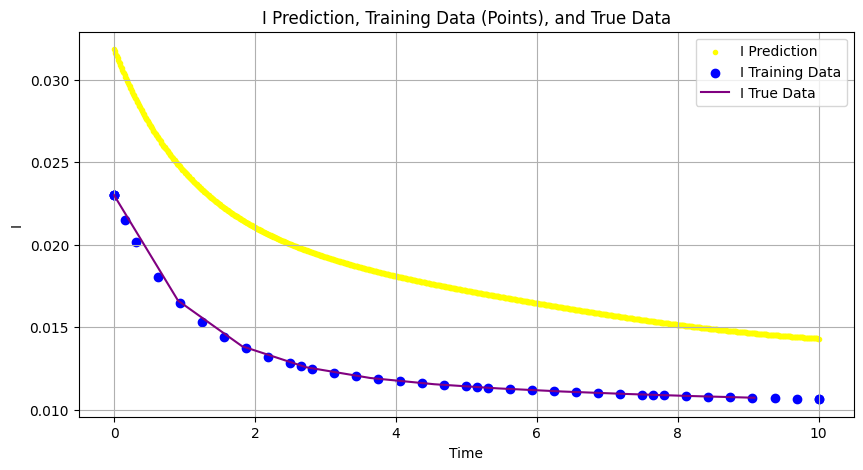

In [ ]:
#######...Case3...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf



Rr = 100.0
R_values = np.array([[500.0], [1000.0],[100.0]])
C_values = np.array([[0.01], [0.01], [0.01]])

U_dc = 1.0
N=len(R_values)

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)




# Define the differential equation
def ode_system(t, I):
    derivatives = []
    for i in range(N):
        derivative_i = dde.grad.jacobian(I, t, i=i) + I[:, i:i+1] / (R_values[i][0] * C_values[i][0])
        derivatives.append(derivative_i)
    derivatives[0]=derivatives[0]-U_dc / (Rr * R_values[0][0] * C_values[0][0])
    return derivatives

    # Define analytical solution
def func(t):
    solutions = []
    for i in range(N):
        R, C = R_values[i][0], C_values[i][0]
        if i == 0:
            solution_i = ((U_dc / Rr) + (U_dc / (R_values[i][0])) * np.exp(-t / (R_values[i][0] * C_values[i][0])))
        else:
            solution_i = ((U_dc / R_values[i][0]) * np.exp(-t / (R_values[i][0] * C_values[i][0])))
        solutions.append(solution_i)
    return np.hstack(tuple(solutions))

#define analytical solution
#def func(t):
#    """Exact solution for dI/dt + I/(RC) = 0"""
#    # The exact solution
#    return np.hstack(((U_dc / R_0)+(U_dc / R_1) * np.exp(-t / (R_1 * C_1)), (U_dc / R_2) * np.exp(-t / (R_2 * C_2)), (U_dc / R_3) * np.exp(-t / (R_3 * C_3))))


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, 10)

IC_list=[dde.icbc.IC(geom, lambda t: U_dc * (1/Rr + 1/R_values[0][0]), boundary, component=0)]
for i in range(1,N):
  ic=dde.icbc.IC(geom, lambda t: (U_dc / R_values[i][0]), boundary, component=i)
  IC_list=IC_list+[ic]
  IC_tuple=tuple(IC_list)


#ic0 = dde.icbc.IC(geom, lambda t: U_dc * (1/Rr + 1/R_0), boundary, component=0)
#ic1 = dde.icbc.IC(geom, lambda t: (U_dc / R_1), boundary, component=1)
#ic2 = dde.icbc.IC(geom, lambda t: (U_dc / R_2), boundary, component=2)


#IC_list.append(dde.icbc.IC(geom, lambda t: (U_dc / R_values[1][0]), boundary, component=1))
#IC_list.append(dde.icbc.IC(geom, lambda t: (U_dc / R_values[2][0]), boundary, component=2))

data = dde.data.PDE(geom, ode_system, IC_list, 35, N, solution=func, num_test=10)


layer_size = [1] + [50] * 3 + [N]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)


# Generate time points for prediction
t_pred = np.linspace(0, 10, 1000).reshape(-1, 1)  # Reshape for compatibility with the model
I_pred = model.predict(t_pred)

t_true = data.test_x
I_true = data.test_y

t_train = data.train_x
I_train = data.train_y

# Predict I1 and I2 using the trained model
# I_pred = model.predict(t_pred)

# Extract I1 and I2 from the predicted values
#I1_pred = I_pred[:, 0]
#I2_pred = I_pred[:, 1]
#I3_pred = I_pred[:, 2]

#I1_true = I_true[:, 0]
#I2_true = I_true[:, 1]
#I3_true = I_true[:, 2]

#I1_train = I_train[:, 0]
#I2_train = I_train[:, 1]
#I3_train = I_train[:, 2]

# Calculate the sum of I1 and I2
I_sum_pred = np.sum(I_pred,axis=1)#I1_pred + I2_pred + I3_pred
I_sum_train = np.sum(I_train,axis=1) #I1_train + I2_train + I3_train
I_sum_true = np.sum(I_true,axis=1) #I1_true + I2_true + I3_true



# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(t_pred, I_sum_pred, label='I Prediction', c='yellow' , marker='.')

# Plot log(I) Training Data as point markers
plt.scatter(t_train, I_sum_train, label='I Training Data', c='blue', marker='o')

# Plot log(I) True Data
plt.plot(t_true, I_sum_true, label='I True Data',  c='purple')

plt.xlabel('Time')
plt.ylabel('I')
plt.legend()
plt.title('I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()
#dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [ ]:
test_list=[]
test_list.append(0)
for i in range(1,N):
#  test_list.append(i)
  test_list.insert(-1,i)

test_list

[1, 2, 0]

Compiling model...
Building feed-forward neural network...
'build' took 0.072683 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.064257 s

Training model...

Step      Train loss                                                                                              Test loss                                                                                               Test metric   
0         [2.60e-02, 1.40e-03, 1.56e-02, 7.70e-03, 1.40e-03, 1.44e-04, 1.00e-04, 1.00e-04, 1.00e-04, 1.00e-04]    [1.71e-02, 6.22e-04, 9.10e-03, 4.21e-03, 1.39e-03, 1.44e-04, 1.00e-04, 1.00e-04, 1.00e-04, 1.00e-04]    [3.67e+01]    
1000      [7.19e-08, 5.29e-08, 2.97e-08, 8.21e-08, 1.95e-08, 1.40e-09, 1.22e-09, 3.21e-09, 2.89e-09, 1.65e-09]    [5.58e-08, 4.97e-08, 2.13e-08, 7.15e-08, 2.02e-08, 1.40e-09, 1.22e-09, 3.21e-09, 2.89e-09, 1.65e-09]    [8.68e-01]    
2000      [4.91e-07, 1.66e-06, 1.77e-07, 5.94e-08, 1.96e-08, 1.47e-07, 4.48e-07, 3.38e-08, 6.88e-09, 7.24e-09]    [3.83e-07, 1.38e-06, 1.52e-07, 4.57e-08, 9.80e-09, 1.47e-07, 4.48e-07, 3.38e-08, 6.88e-09, 7.24e-09]    [8.49e-01]    
3000      [8.63e-09, 6

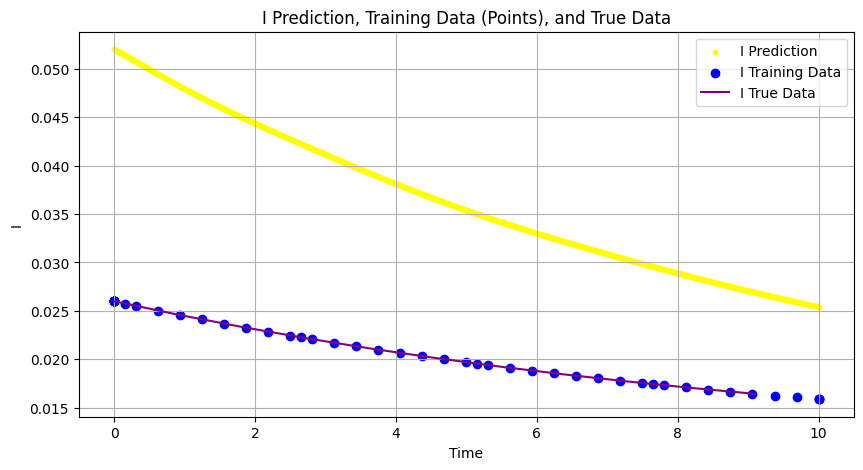

In [ ]:
#######...CaseN...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

Rr = 100.0
R_values = np.array([[500.0], [1000.0], [500.0], [1000.0],[100.0]])
C_values = np.array([[0.02], [0.01], [0.02], [0.01], [0.1]])

U_dc = 1.0
N=len(R_values)

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)




# Define the differential equation
def ode_system(t, I):
    derivatives = []
    for i in range(N):
        derivative_i = dde.grad.jacobian(I, t, i=i) + I[:, i:i+1] / (R_values[i][0] * C_values[i][0])
        derivatives.append(derivative_i)
    derivatives[0]=derivatives[0]-U_dc / (Rr * R_values[0][0] * C_values[0][0])
    return derivatives

    # Define analytical solution
def func(t):
    solutions = []
    for i in range(N):
        R, C = R_values[i][0], C_values[i][0]
        if i == 0:
            solution_i = ((U_dc / Rr) + (U_dc / R) * np.exp(-t / (R * C)))
        else:
            solution_i = ((U_dc / R) * np.exp(-t / (R * C)))
        solutions.append(solution_i)
    return np.hstack(solutions)


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial

geom = dde.geometry.TimeDomain(0, 10)
initial_conditions = [dde.IC(geom, lambda t: U_dc * (1/Rr + 1/R_values[0][0]), boundary, component=0)]
for i in range(1,N):
  initial_conditions_i = dde.IC(geom, lambda t: U_dc * (1/R_values[i][0]), boundary, component=i)
  initial_conditions.append(initial_conditions_i)


data = dde.data.PDE(geom, ode_system, initial_conditions, 35, N, solution=func, num_test=10)


layer_size = [1] + [50] * 3 + [N]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)


# Generate time points for prediction
t_pred = np.linspace(0, 10, 1000).reshape(-1, 1)  # Reshape for compatibility with the model
I_pred = model.predict(t_pred)

t_true = data.test_x
I_true = data.test_y

t_train = data.train_x
I_train = data.train_y

# Calculate the sum of I1 and I2
I_sum_pred = np.sum(I_pred,axis=1)
I_sum_train = np.sum(I_train,axis=1)
I_sum_true = np.sum(I_true,axis=1)


# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(t_pred, I_sum_pred, label='I Prediction', c='yellow' , marker='.')

# Plot log(I) Training Data as point markers
plt.scatter(t_train, I_sum_train, label='I Training Data', c='blue', marker='o')

# Plot log(I) True Data
plt.plot(t_true, I_sum_true, label='I True Data',  c='purple')

plt.xlabel('Time')
plt.ylabel('I')
plt.legend()
plt.title('I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()
#dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# FP
### Mistakes:

* In the ode_systems, you defined something like dI_i. When you define a variablelike this, i is a charachter. It will not understand dI_1,... . Look at below example.

* In the func: when you want to apply np.hstack() it should be a tuple not a list: tuple is something with paranthesis and list is with bracket.

Compiling model...
Building feed-forward neural network...
'build' took 0.064986 s

'compile' took 1.465346 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric   
0         [6.17e-03, 1.32e-03, 2.84e-03, 2.47e-02, 1.00e-06, 1.00e-06, 1.00e-06, 1.00e-06]    [6.16e-03, 1.38e-03, 2.90e-03, 2.03e-02, 1.00e-06, 1.00e-06, 1.00e-06, 1.00e-06]    [5.19e+01]    
1000      [2.51e-08, 1.58e-07, 9.38e-08, 2.63e-07, 1.89e-12, 1.10e-13, 2.36e-10, 1.79e-12]    [2.55e-08, 1.60e-07, 7.85e-08, 2.42e-07, 1.89e-12, 1.10e-13, 2.36e-10, 1.79e-12]    [5.86e-01]    
2000      [1.40e-08, 1.12e-07, 1.71e-08, 7.37e-08, 3.12e-13, 1.94e-13, 4.34e-11, 1.29e-12]    [1.53e-08, 1.05e-07, 1.48e-08, 6.94e-08, 3.12e-13, 1.94e-13, 4.34e-11, 1.29e-12]    [5.87e-01]    
3000      [2.18e-08, 7.66e-08, 1.22e-07, 2.97e-08, 1.14e-10, 2.30e-10, 5.71e-10, 1.16e-11]    [2.3

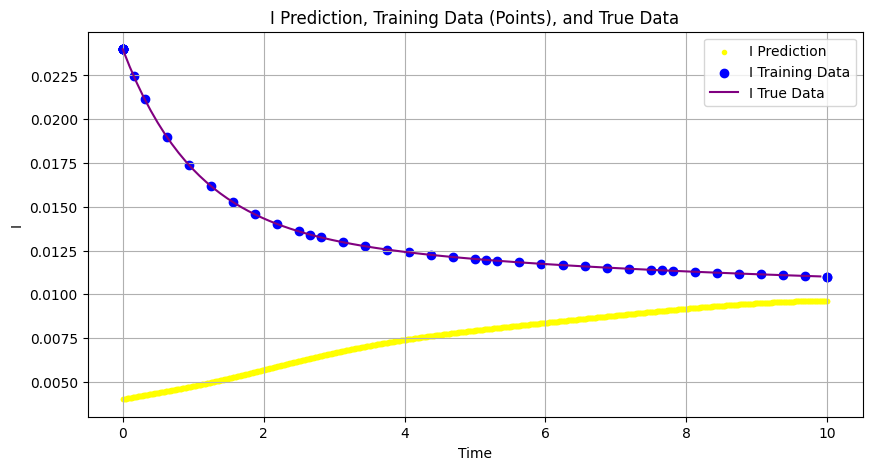

In [ ]:
#######...Case3...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf



Rr = 100.0
R_values = np.array([[500.0], [1000.0],[100.0],[1000]])
C_values = np.array([[0.01], [0.01], [0.01],[0.01]])

U_dc = 1.0
N=len(R_values)

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)




# Define the differential equation
def ode_system(t, I):
    derivatives = []
    for i in range(N):
        derivative_i = dde.grad.jacobian(I, t, i=i) + I[:, i:i+1] / (R_values[i][0] * C_values[i][0])
        derivatives.append(derivative_i)
    derivatives[0]=derivatives[0]-U_dc / (Rr * R_values[0][0] * C_values[0][0])
    return derivatives

    # Define analytical solution
def func(t):
    solutions = []
    for i in range(N):
        R, C = R_values[i][0], C_values[i][0]
        if i == 0:
            solution_i = ((U_dc / Rr) + (U_dc / R) * np.exp(-t / (R * C)))
        else:
            solution_i = ((U_dc / R) * np.exp(-t / (R * C)))
        solutions.append(solution_i)
    return np.hstack(tuple(solutions))

#define analytical solution
#def func(t):
#    """Exact solution for dI/dt + I/(RC) = 0"""
#    # The exact solution
#    return np.hstack(((U_dc / R_0)+(U_dc / R_1) * np.exp(-t / (R_1 * C_1)), (U_dc / R_2) * np.exp(-t / (R_2 * C_2)), (U_dc / R_3) * np.exp(-t / (R_3 * C_3))))


# Define the initial condition function
def boundary(t, on_initial):
    return dde.utils.isclose(t[0], 0)
#def boundary(_, on_initial):
#    return on_initial


geom = dde.geometry.TimeDomain(0, 10)

init_func=[lambda t: func(0)[i] for i in range(N)]
#init_func[0]=lambda t: U_dc*(1.0/Rr +1.0/R_values[0][0])
#init_func=func(0)


IC_list=[]
#IC_list=[dde.icbc.IC(geom, init_func[i], boundary, component=i) for i in range(N)]
#IC_list[0]=dde.icbc.IC(geom, lambda t: U_dc*(1.0/Rr +1.0/R_values[0][0]), boundary, component=0)
for i in range(N):
  ic=dde.icbc.IC(geom, init_func[i], boundary, component=i)
  IC_list=IC_list+[ic]
#IC_list.append(dde.icbc.IC(geom, lambda t: (U_dc / R_values[1][0]), boundary, component=1))

#def ic_f(t):
#  return U_dc / R_values[1][0]

#IC_list.append(dde.icbc.IC(geom, ic_f, boundary, component=1))
#IC_list.append(dde.icbc.IC(geom, lambda t: (U_dc / R_values[2][0]), boundary, component=2))
#IC_list.append(dde.icbc.IC(geom, lambda t: (U_dc / R_values[3][0]), boundary, component=3))

data = dde.data.PDE(geom, ode_system, IC_list, 35, N, solution=func, num_test=100)


layer_size = [1] + [50] * 3 + [N]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)


# Generate time points for prediction
t_pred = np.linspace(0, 10, 1000).reshape(-1, 1)  # Reshape for compatibility with the model
I_pred = model.predict(t_pred)

t_true = data.test_x
I_true = data.test_y

t_train = data.train_x
I_train = data.train_y

# Predict I1 and I2 using the trained model
# I_pred = model.predict(t_pred)

# Extract I1 and I2 from the predicted values

I1_pred = I_pred[:, 0]
I2_pred = I_pred[:, 1]
I3_pred = I_pred[:, 2]
I4_pred = I_pred[:, 3]

I1_true = I_true[:, 0]
I2_true = I_true[:, 1]
I3_true = I_true[:, 2]
I4_true = I_true[:, 3]

I1_train = I_train[:, 0]
I2_train = I_train[:, 1]
I3_train = I_train[:, 2]
I4_train = I_train[:, 3]

# Calculate the sum of I1 and I2
I_sum_pred = np.sum(I_pred,axis=1)#I1_pred + I2_pred + I3_pred
I_sum_train = np.sum(I_train,axis=1) #I1_train + I2_train + I3_train
I_sum_true = np.sum(I_true,axis=1) #I1_true + I2_true + I3_true

#I_sum_pred = I2_pred
#I_sum_train = I2_train
#I_sum_true = I2_true

# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(t_pred, I_sum_pred, label='I Prediction', c='yellow' , marker='.')

# Plot log(I) Training Data as point markers
plt.scatter(t_train, I_sum_train, label='I Training Data', c='blue', marker='o')

# Plot log(I) True Data
plt.plot(t_true, I_sum_true, label='I True Data',  c='purple')

plt.xlabel('Time')
plt.ylabel('I')
plt.legend()
plt.title('I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()
#dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [ ]:
init_func

[[<function __main__.<lambda>(t)>],
 <function __main__.<listcomp>.<lambda>(t)>,
 <function __main__.<listcomp>.<lambda>(t)>,
 <function __main__.<listcomp>.<lambda>(t)>]

In [ ]:
ic0=IC_list[0]
ic0.collocation_points

<bound method IC.collocation_points of <deepxde.icbc.initial_conditions.IC object at 0x7e60718e96c0>>

In [ ]:
ic0.geom

In [ ]:
np.sum(func(10))

0.010639458006239918

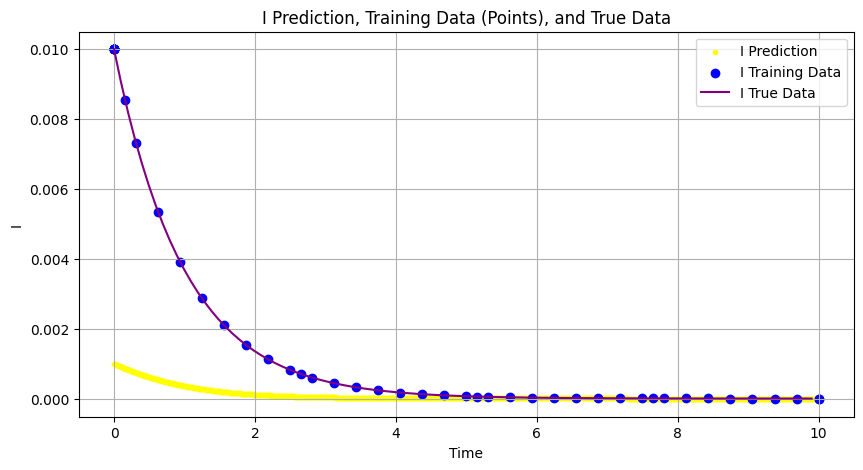

In [ ]:
I_sum_pred = I3_pred
I_sum_train = I3_train
I_sum_true = I3_true

# Create a single figure for all plots
plt.figure(figsize=(10, 5))

# Plot log(I) Prediction
plt.scatter(t_pred, I_sum_pred, label='I Prediction', c='yellow' , marker='.')

# Plot log(I) Training Data as point markers
plt.scatter(t_train, I_sum_train, label='I Training Data', c='blue', marker='o')

# Plot log(I) True Data
plt.plot(t_true, I_sum_true, label='I True Data',  c='purple')

plt.xlabel('Time')
plt.ylabel('I')
plt.legend()
plt.title('I Prediction, Training Data (Points), and True Data')
plt.grid(True)

plt.show()

In [ ]:
func(0)

array([0.012, 0.001, 0.01 , 0.01 ])